In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
sns.set(style="ticks", color_codes=True)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Set working directory
os.chdir("")

In [3]:
#Load data
absenteeism_data = pd.read_csv("Absenteeism_dataset.csv")

In [4]:
#Removing spaces from column headers
absenteeism_data.columns = absenteeism_data.columns.str.replace(' ', '_')

# Exploratory Data Analysis

In [5]:
#Renaming column
absenteeism_data = absenteeism_data.rename(columns = {'Work_load_Average/day_': 'Work_load_Average_per_day'})

In [6]:
# #Renaming column and parsing object datatype into int
# absenteeism_data['Work_load_Average_per_day'] = absenteeism_data[pd.to_numeric(absenteeism_data.Work_load_Average_per_day, errors='coerce').isnull()]
# absenteeism_data['Work_load_Average_per_day'] = absenteeism_data['Work_load_Average_per_day'].astype(str).astype(float)

In [7]:
#Assigning levels to the categories
lis = []
for i in range(0, absenteeism_data.shape[1]):
    #print(i)
    if(absenteeism_data.iloc[:,i].dtypes == 'object'):
        absenteeism_data.iloc[:,i] = pd.Categorical(absenteeism_data.iloc[:,i])
        #print(marketing_train[[i]])
        absenteeism_data.iloc[:,i] = absenteeism_data.iloc[:,i].cat.codes 
        absenteeism_data.iloc[:,i] = absenteeism_data.iloc[:,i].astype('float')
        lis.append(absenteeism_data.columns[i])

In [8]:
#Observing sample data
absenteeism_data.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,6.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,6.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,6.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,6.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,6.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [9]:
#Observing summary of data
absenteeism_data.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,740.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,17.424324,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,11.376730,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,-1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,7.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,17.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,27.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,37.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
#Fetching the datatype of each column
absenteeism_data.dtypes

ID                                   int64
Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average_per_day          float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Son                                float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [11]:
#Fetching unique value count in each column
absenteeism_data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average_per_day          39
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [12]:
#Splitting the dataset into numerical and categorical variables
numeric_variables_list = ["Transportation_expense","Distance_from_Residence_to_Work","Service_time","Age","Work_load_Average_per_day","Hit_target","Weight","Height","Body_mass_index","Absenteeism_time_in_hours"]
numeric_pred_variables_list = ["Transportation_expense","Distance_from_Residence_to_Work","Service_time","Age","Work_load_Average_per_day","Hit_target","Weight","Height","Body_mass_index"]
categorical_pred_variable_list = ["ID","Reason_for_absence","Month_of_absence","Day_of_the_week","Seasons","Disciplinary_failure","Education","Son","Social_drinker","Social_smoker","Pet"]
#Converting the datatype of categorical values
for i in categorical_pred_variable_list :
    absenteeism_data[i] = absenteeism_data[i].astype("category")

In [49]:
#Verifying the datatype of each column
absenteeism_data.dtypes

ID                                 category
Reason_for_absence                 category
Month_of_absence                   category
Day_of_the_week                    category
Seasons                            category
Transportation_expense              float64
Distance_from_Residence_to_Work     float64
Service_time                        float64
Age                                 float64
Work_load_Average_per_day           float64
Hit_target                          float64
Disciplinary_failure               category
Education                          category
Son                                category
Social_drinker                     category
Social_smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body_mass_index                     float64
Absenteeism_time_in_hours           float64
dtype: object

# Missing Value Analysis



In [14]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(absenteeism_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
#missing_val.to_csv("Absenteeism_dataset_missingvalues.csv", index = False)
missing_val

,Variables,Missing_percentage
0,Body_mass_index,31
1,Absenteeism_time_in_hours,22
2,Height,14
3,Education,10
4,Transportation_expense,7
5,Disciplinary_failure,6
6,Son,6
7,Hit_target,6
8,Social_smoker,4
9,Age,3


In [15]:
# absenteeism_id_list = absenteeism_data['ID'].unique()
# absenteeism_id_sorted = sorted(absenteeism_id_list)
#absenteeism_data["Reason_for_absence"].cat.categories

## Imputation

In [16]:
#Replacing 0s with NA as it is not logically possible for the below columns
for i in ["Reason_for_absence","Month_of_absence","Day_of_the_week","Seasons","Education","ID","Age","Weight","Height","Body_mass_index"]:
        absenteeism_data[i] = absenteeism_data[i].replace(0,np.nan)

In [17]:
#Imputing Reason_for_absence column with default value
values_imputation = {'Reason_for_absence': 26.0}
absenteeism_data = absenteeism_data.fillna(value=values_imputation)

### Imputing missing values with mean/mode grouped by id

In [18]:
#Imputing Numerical variables with mean
for i in ["Transportation_expense","Distance_from_Residence_to_Work","Service_time","Age","Weight","Height","Absenteeism_time_in_hours"]:
    absenteeism_data[i] = absenteeism_data[i].fillna(absenteeism_data.groupby('ID')[i].transform('mean'))

In [19]:
#Imputing BMI values
id_list = absenteeism_data.loc[absenteeism_data['Body_mass_index'].isnull(),'ID']
for i in id_list:
#     height = absenteeism_data['Height'][absenteeism_data['ID']== i]
#     weight = absenteeism_data['Weight'][absenteeism_data['ID']== i]
#     bmi = round((weight*10000) / (height**2))
    absenteeism_data.loc[(absenteeism_data['Body_mass_index'].isnull()) & (absenteeism_data['ID']==i),'Body_mass_index'] = absenteeism_data.loc[absenteeism_data['ID']==i,'Body_mass_index'].mode()[0]
    

In [20]:
#Imputing Categorical variables with mode
for i in ["Reason_for_absence","Education","Son","Social_drinker","Social_smoker","Pet"]:
    id_list = absenteeism_data.loc[absenteeism_data[i].isnull(),'ID']
    for j in id_list:
        absenteeism_data.loc[(absenteeism_data[i].isnull()) & (absenteeism_data['ID']==j),i] = absenteeism_data.loc[absenteeism_data['ID']==j,i].mode()[0]

### Imputing missing values using KNN imputation

In [21]:
# from sklearn.impute import KNNImputer

In [22]:
# imputer = KNNImputer(n_neighbors=2)
# absenteeism_data = imputer.fit_transform(absenteeism_data)

### Imputing missing values with overall mean

In [23]:
#Imputing Numerical variables with mean
#Hit target and Work_load_Average_per_day
absenteeism_data["Hit_target"] = absenteeism_data["Hit_target"].fillna(absenteeism_data["Hit_target"].mean())
absenteeism_data["Work_load_Average_per_day"] = absenteeism_data["Work_load_Average_per_day"].fillna(absenteeism_data["Work_load_Average_per_day"].mean())


In [24]:
#Categorical variables
for i in ["Disciplinary_failure","Month_of_absence","Seasons","Day_of_the_week"]:
    absenteeism_data[i] = absenteeism_data[i].fillna(absenteeism_data[i].mode()[0])

In [25]:
#Checking number of missing values
absenteeism_data.isnull().sum().sum()

0

In [26]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(absenteeism_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
#missing_val.to_csv("Absenteeism_dataset_missingvalues.csv", index = False)
missing_val

,Variables,Missing_percentage
0,ID,0
1,Disciplinary_failure,0
2,Body_mass_index,0
3,Height,0
4,Weight,0
5,Pet,0
6,Social_smoker,0
7,Social_drinker,0
8,Son,0
9,Education,0


## Distribution analysis

### Using histogram for numerical variables

<AxesSubplot:xlabel='Transportation_expense', ylabel='Density'>

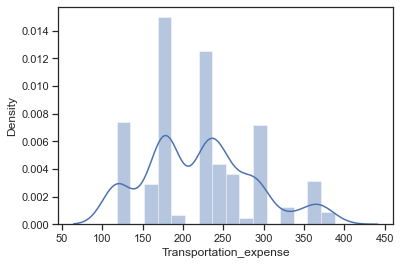

In [27]:
#Transportation_expense
sns.distplot(absenteeism_data['Transportation_expense'])

<AxesSubplot:xlabel='Distance_from_Residence_to_Work', ylabel='Density'>

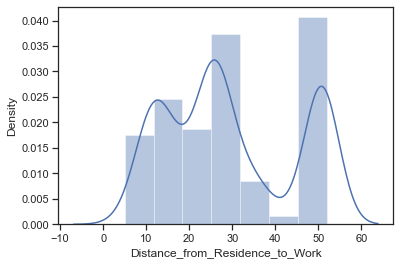

In [28]:
#Distance_from_Residence_to_Work
sns.distplot(absenteeism_data['Distance_from_Residence_to_Work'])

<AxesSubplot:xlabel='Service_time', ylabel='Density'>

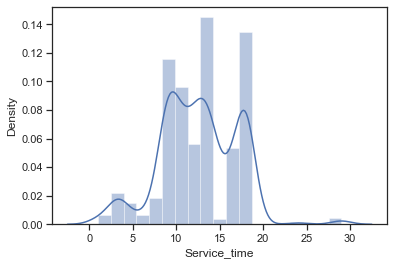

In [29]:
#Service_time
sns.distplot(absenteeism_data['Service_time'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

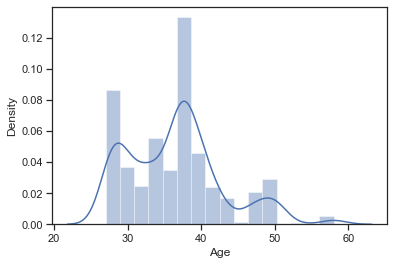

In [30]:
#Age
sns.distplot(absenteeism_data['Age'])

<AxesSubplot:xlabel='Hit_target', ylabel='Density'>

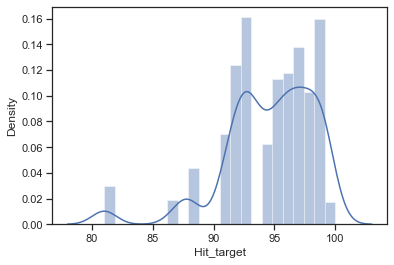

In [31]:
#Hit_target
sns.distplot(absenteeism_data['Hit_target'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

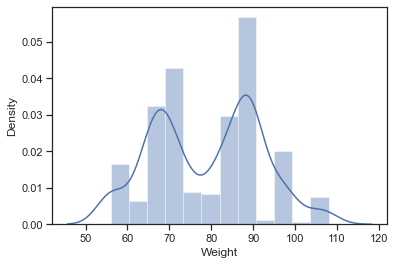

In [32]:
#Weight
sns.distplot(absenteeism_data['Weight'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

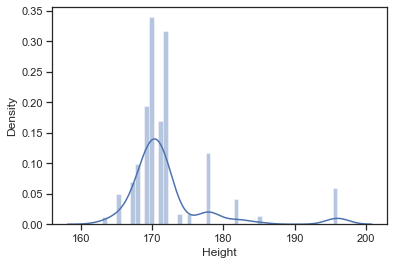

In [33]:
#Height
sns.distplot(absenteeism_data['Height'])

<AxesSubplot:xlabel='Body_mass_index', ylabel='Density'>

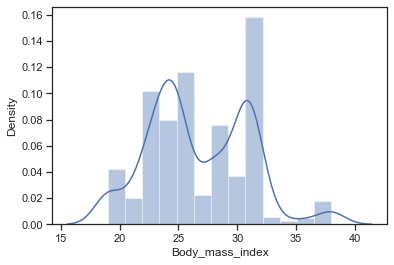

In [34]:
#Body_mass_index
sns.distplot(absenteeism_data['Body_mass_index'])

<AxesSubplot:xlabel='Work_load_Average_per_day', ylabel='Density'>

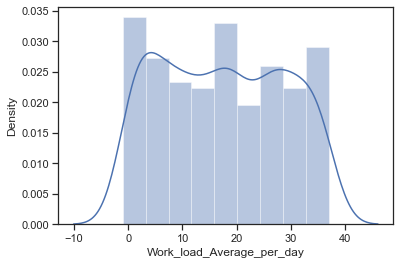

In [35]:
#Work_load_Average_per_day
sns.distplot(absenteeism_data['Work_load_Average_per_day'])

Text(0.5, 1.0, 'Histogram of Absenteeism time in hours')

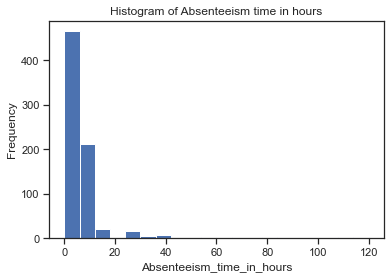

In [36]:
#Note:The warnings created by distplot are suppressed. 
#Matplotlib can also be used to plot histograms instead of sns.distplot
plt.hist(absenteeism_data['Absenteeism_time_in_hours'],bins = 20)
plt.xlabel("Absenteeism_time_in_hours")
plt.ylabel("Frequency")
plt.title("Histogram of Absenteeism time in hours")

### Using barplot(heatmap) for categorical variables

<AxesSubplot:xlabel='ID', ylabel='count'>

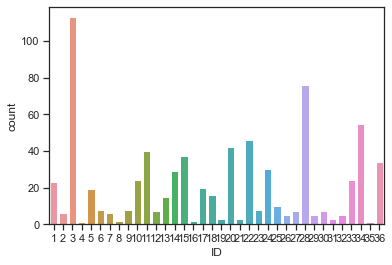

In [37]:
#ID
sns.countplot(absenteeism_data["ID"])

<AxesSubplot:xlabel='Reason_for_absence', ylabel='count'>

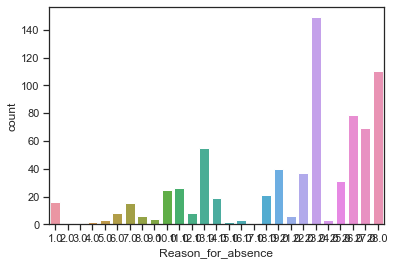

In [38]:
#Reason_for_absence
sns.countplot(absenteeism_data["Reason_for_absence"])

<AxesSubplot:xlabel='Month_of_absence', ylabel='count'>

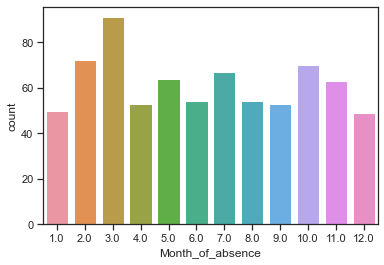

In [39]:
#Month_of_absence
sns.countplot(absenteeism_data["Month_of_absence"])

<AxesSubplot:xlabel='Day_of_the_week', ylabel='count'>

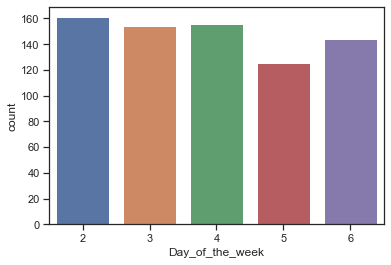

In [40]:
#Day_of_the_week
sns.countplot(absenteeism_data["Day_of_the_week"])

<AxesSubplot:xlabel='Seasons', ylabel='count'>

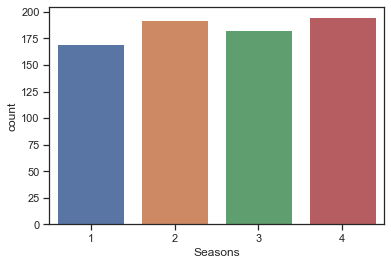

In [41]:
#Seasons
sns.countplot(absenteeism_data["Seasons"])

<AxesSubplot:xlabel='Disciplinary_failure', ylabel='count'>

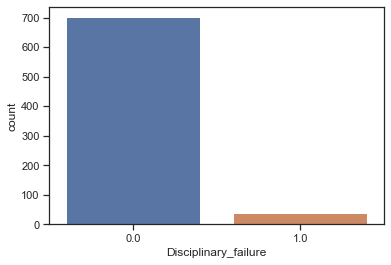

In [42]:
#Disciplinary_failure
sns.countplot(absenteeism_data["Disciplinary_failure"])

<AxesSubplot:xlabel='Education', ylabel='count'>

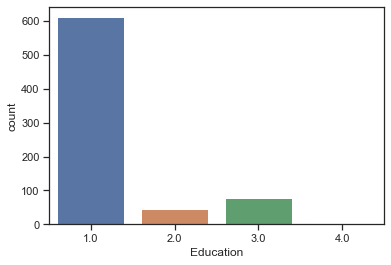

In [43]:
#Education
sns.countplot(absenteeism_data["Education"])

<AxesSubplot:xlabel='Son', ylabel='count'>

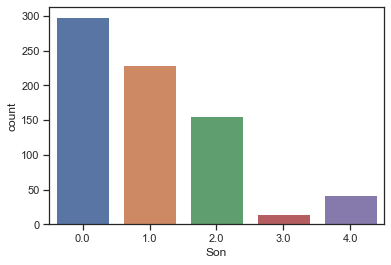

In [44]:
#Son
sns.countplot(absenteeism_data["Son"])

<AxesSubplot:xlabel='Social_drinker', ylabel='count'>

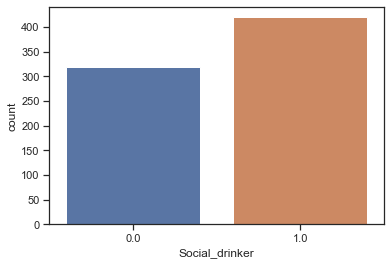

In [45]:
#Social_drinker
sns.countplot(absenteeism_data["Social_drinker"])

<AxesSubplot:xlabel='Social_smoker', ylabel='count'>

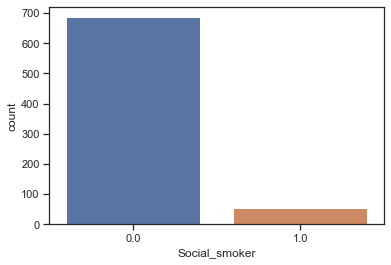

In [46]:
#Social_smoker
sns.countplot(absenteeism_data["Social_smoker"])

<AxesSubplot:xlabel='Pet', ylabel='count'>

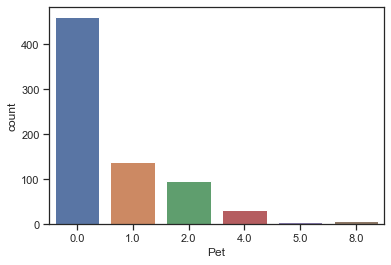

In [47]:
#ID
sns.countplot(absenteeism_data["Pet"])

## Outlier Analysis

In [48]:
#Storing all column names
variables_list = ["Transportation_expense","Distance_from_Residence_to_Work","Service_time","Age","Hit_target","Weight","Height","Body_mass_index","ID","Reason_for_absence","Month_of_absence","Day_of_the_week","Seasons","Disciplinary_failure","Education","Son","Social_drinker","Social_smoker","Pet"]
#"Work_load_Average_day",
#sns.boxplot(absenteeism_data[Transportation_expense],absenteeism_data['Absenteeism_time_in_hours'])  

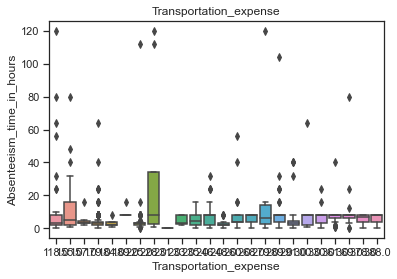

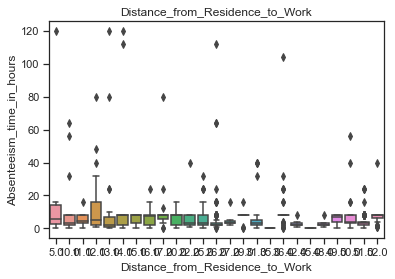

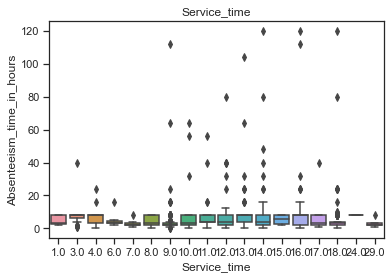

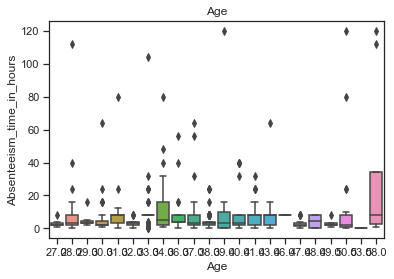

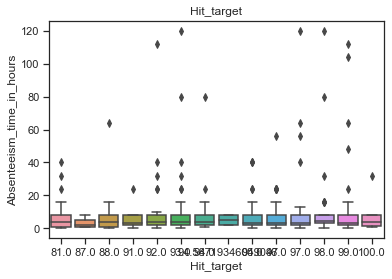

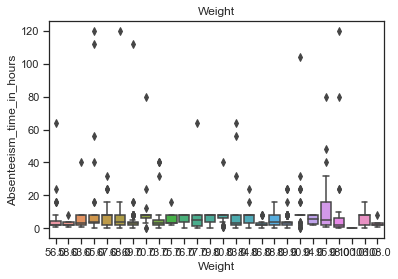

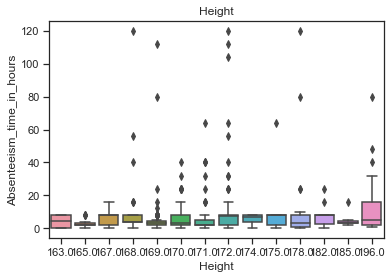

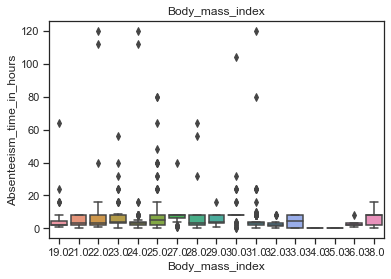

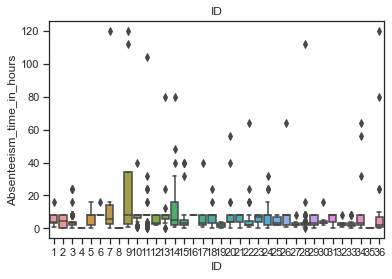

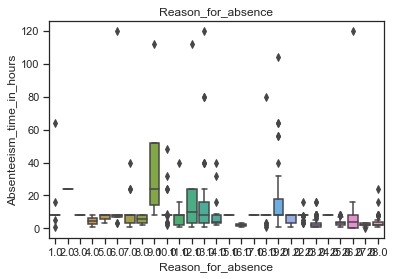

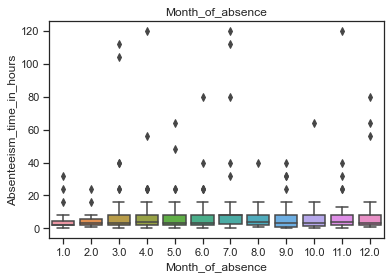

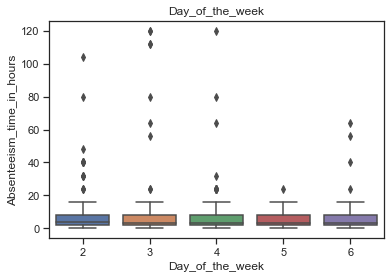

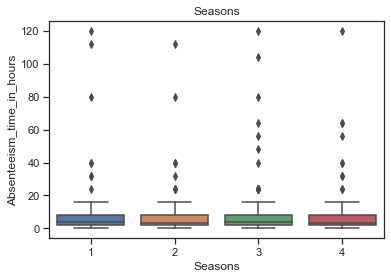

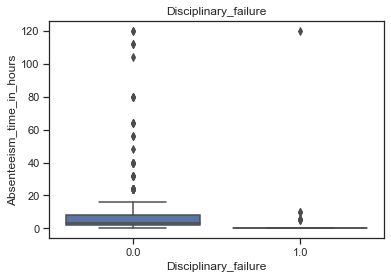

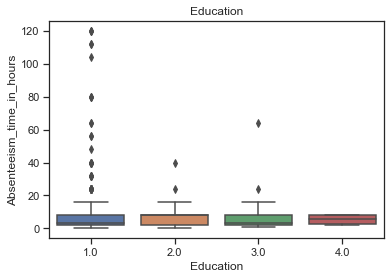

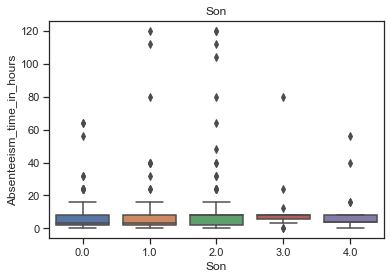

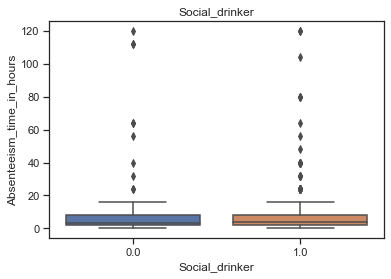

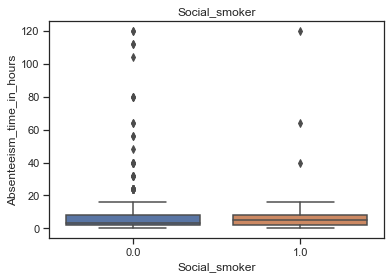

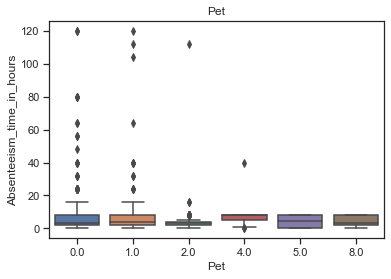

In [49]:
#plotting boxplot for all the predictors with outliers
for var in variables_list:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(absenteeism_data[var],absenteeism_data['Absenteeism_time_in_hours'])
    plt.title(var)
    plt.show()

In [50]:
for i in numeric_variables_list:
    #print(i)
    q75, q25 = np.percentile(absenteeism_data.loc[:,i], [75,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #print(minimum)
    #print(maximum)
    
    print('{var} : {X} Outliers'.format(var = i, X = (absenteeism_data.loc[absenteeism_data.loc[:,i] < minimum,i].count() + absenteeism_data.loc[absenteeism_data.loc[:,i] > maximum,i].count())))  
    #Imputing outliers with minimum and maximum values
    absenteeism_data.loc[absenteeism_data[i] < minimum,i] = np.nan
    absenteeism_data.loc[absenteeism_data[i] > maximum,i] = np.nan
    

Transportation_expense : 3 Outliers
Distance_from_Residence_to_Work : 0 Outliers
Service_time : 5 Outliers
Age : 8 Outliers
Work_load_Average_per_day : 0 Outliers
Hit_target : 19 Outliers
Weight : 0 Outliers
Height : 119 Outliers
Body_mass_index : 0 Outliers
Absenteeism_time_in_hours : 43 Outliers


In [51]:
pd.DataFrame(absenteeism_data.isnull().sum())

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,3
Distance_from_Residence_to_Work,0
Service_time,5
Age,8
Work_load_Average_per_day,0


### Imputing values

In [52]:
#defining impute_variables:
def impute_variables(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = data_set[i].fillna(data_set[i].median())

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
            data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
    return data_set

In [53]:
#impute NaN with median value for numerical and mode for categorical data
absenteeism_data = impute_variables(absenteeism_data)

In [54]:
#Checking number of missing values
absenteeism_data.isnull().sum().sum()

0

## Feature Selection

### Using Correlation matrix and VIF technique for numerical data

In [55]:
##Correlation analysis
#Correlation plot
corr_matrix = absenteeism_data.loc[:,numeric_variables_list]

<AxesSubplot:>

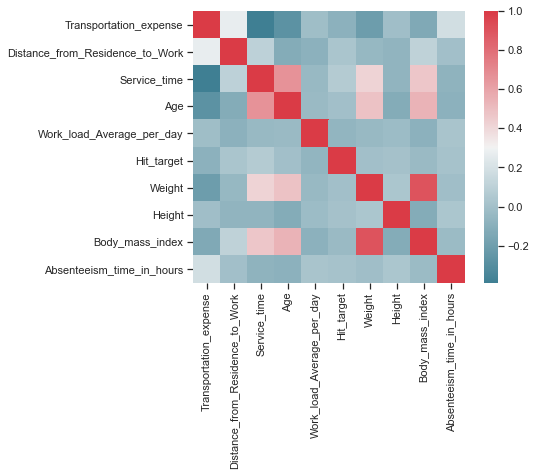

In [56]:
#Setting the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = corr_matrix.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [57]:
absenteeism_data[numeric_variables_list].corr()
#It is infered that variables weight and body mass index are highly correlated. Hence one of it can be omitted

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1.000000,0.275428,-0.390977,-0.272291,-0.012572,-0.083550,-0.207745,-0.005938,-0.132020,0.183180
Distance_from_Residence_to_Work,0.275428,1.000000,0.106384,-0.116169,-0.086438,0.030338,-0.047859,-0.068603,0.113772,-0.000449
Service_time,-0.390977,0.106384,1.000000,0.667026,-0.042846,0.069463,0.421130,-0.069120,0.469020,-0.075805
Age,-0.272291,-0.116169,0.667026,1.000000,-0.032426,-0.001335,0.487374,-0.114714,0.542863,-0.084535
Work_load_Average_per_day,-0.012572,-0.086438,-0.042846,-0.032426,1.000000,-0.060008,-0.041620,-0.022100,-0.082726,0.025548
Hit_target,-0.083550,0.030338,0.069463,-0.001335,-0.060008,1.000000,-0.004726,0.010069,-0.036785,0.014684
Weight,-0.207745,-0.047859,0.421130,0.487374,-0.041620,-0.004726,1.000000,0.034853,0.904117,-0.007576
Height,-0.005938,-0.068603,-0.069120,-0.114714,-0.022100,0.010069,0.034853,1.000000,-0.118993,0.037764
Body_mass_index,-0.132020,0.113772,0.469020,0.542863,-0.082726,-0.036785,0.904117,-0.118993,1.000000,-0.031638
Absenteeism_time_in_hours,0.183180,-0.000449,-0.075805,-0.084535,0.025548,0.014684,-0.007576,0.037764,-0.031638,1.000000


In [58]:
#VIF
VIF_df = absenteeism_data[numeric_variables_list].assign(const = 1)
pd.Series([variance_inflation_factor(VIF_df.values,i) for i in range(VIF_df.shape[1])],index=VIF_df.columns)
#From correlation matrix and VIF analysis it is infered that variables weight and body mass index are highly correlated. Hence one of it can be omitted.We will be omitting weight

Transportation_expense                 1.424041
Distance_from_Residence_to_Work        1.429705
Service_time                           2.292453
Age                                    2.306365
Work_load_Average_per_day              1.024650
Hit_target                             1.029171
Weight                                 7.371346
Height                                 1.157707
Body_mass_index                        8.252827
Absenteeism_time_in_hours              1.048683
const                              12516.065665
dtype: float64

### Using ANOVA technique for categorical data

In [59]:
for i in categorical_pred_variable_list:
    print(i) 
    print(stats.f_oneway(absenteeism_data[i],absenteeism_data['Absenteeism_time_in_hours']))

ID
F_onewayResult(statistic=1046.84059570791, pvalue=4.428940518145323e-174)
Reason_for_absence
F_onewayResult(statistic=3252.598691961359, pvalue=0.0)
Month_of_absence
F_onewayResult(statistic=130.60513133889617, pvalue=4.811469772568523e-29)
Day_of_the_week
F_onewayResult(statistic=8.790490943738725, pvalue=0.0030765757200355574)
Seasons
F_onewayResult(statistic=184.50092252932188, pvalue=1.0925911694626689e-39)
Disciplinary_failure
F_onewayResult(statistic=1182.937758420434, pvalue=6.045767744318007e-191)
Education
F_onewayResult(statistic=574.42081814584, pvalue=1.649394908824148e-107)
Son
F_onewayResult(statistic=641.7926847908078, pvalue=6.829638928484887e-118)
Social_drinker
F_onewayResult(statistic=898.7769490791635, pvalue=1.1525923573593214e-154)
Social_smoker
F_onewayResult(statistic=1169.878208775719, pvalue=2.300481866993278e-189)
Pet
F_onewayResult(statistic=721.9258282157014, pvalue=8.095704928790522e-130)


### Dimentionality Reduction

In [60]:
absenteeism_data = absenteeism_data.drop(["Weight",],axis = 1)
absenteeism_data.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,6.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.0,30.0,4.0
1,36,26.0,7.0,3,1,118.0,13.0,18.0,50.0,6.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,170.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,6.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,6.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,6.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.0,30.0,2.0


## Sampling

In [61]:
#Parsing all the variable into float
for i in absenteeism_data.columns.values:
    absenteeism_data[i] = absenteeism_data[i].astype('float')
absenteeism_data.dtypes

ID                                 float64
Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                    float64
Seasons                            float64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average_per_day          float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Son                                float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [62]:
#Splitting data into train and test set
X = absenteeism_data.iloc[:,0:14].values
y = absenteeism_data.iloc[:,14].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Model Building

In [63]:
#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

### Multiple linear regression

In [64]:
# Root Mean Squared Error: 0.3918619392842273
# R^2 Score(coefficient of determination) = 0.3594580473656487

In [65]:
#Training
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

In [66]:
#Predicting test values
y_pred_mlr = regressor_mlr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_mlr.reshape(len(y_pred_mlr),1), y_test.reshape(len(y_test),1)),1))

[[ 0.6   0.  ]
 [ 0.54  1.  ]
 [ 1.05  1.  ]
 [ 1.12  0.  ]
 [ 0.69  1.  ]
 [ 0.78  1.  ]
 [ 0.85  1.  ]
 [ 0.79  0.  ]
 [ 0.15  0.  ]
 [ 0.21  1.  ]
 [ 0.33  0.  ]
 [ 0.75  1.  ]
 [ 0.41  1.  ]
 [ 0.13  1.  ]
 [ 0.78  1.  ]
 [ 0.9   1.  ]
 [ 0.31  0.  ]
 [ 0.61  1.  ]
 [ 0.31  0.  ]
 [ 0.91  1.  ]
 [ 0.48  1.  ]
 [ 0.54  0.  ]
 [ 0.94  1.  ]
 [ 0.61  0.  ]
 [ 0.1   0.  ]
 [ 0.14  1.  ]
 [ 0.37  0.  ]
 [ 0.07  0.  ]
 [ 0.24  0.  ]
 [ 0.11  0.  ]
 [ 0.56  1.  ]
 [-0.07  0.  ]
 [ 0.69  1.  ]
 [ 0.21  0.  ]
 [ 0.4   1.  ]
 [ 1.04  1.  ]
 [ 0.59  1.  ]
 [-0.09  0.  ]
 [ 0.75  1.  ]
 [ 0.85  1.  ]
 [ 0.87  1.  ]
 [ 0.42  1.  ]
 [ 0.84  1.  ]
 [ 0.87  1.  ]
 [ 1.04  1.  ]
 [ 1.01  1.  ]
 [ 0.11  0.  ]
 [ 0.81  1.  ]
 [ 0.53  0.  ]
 [ 0.52  1.  ]
 [ 0.69  1.  ]
 [ 0.48  0.  ]
 [ 0.59  1.  ]
 [ 1.01  1.  ]
 [ 0.25  0.  ]
 [ 0.51  1.  ]
 [-0.12  0.  ]
 [ 0.42  1.  ]
 [ 0.13  0.  ]
 [ 1.06  1.  ]
 [-0.1   0.  ]
 [ 0.4   0.  ]
 [-0.14  0.  ]
 [ 1.09  1.  ]
 [ 0.86  1.  ]
 [ 0.84  1.  ]
 [ 0.81  1

In [67]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, y_pred_mlr)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, y_pred_mlr)))

Root Mean Squared Error: 0.3918619392842273
R^2 Score(coefficient of determination) = 0.3594580473656487


### Decision tree

In [68]:
# Root Mean Squared Error: 0.3049442902756884
# R^2 Score(coefficient of determination) = 0.6120976374325146

In [69]:
#Training
regressor_dt = DecisionTreeRegressor(max_depth=2,random_state = 0)
regressor_dt.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [70]:
#Predicting test value
y_pred_dt = regressor_dt.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test.reshape(len(y_test),1)),1))

[[0.86 0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 0.  ]
 [0.   0.  ]
 [0.84 1.  ]
 [0.84 0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.84 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 0.  ]
 [0.86 1.  ]
 [0.86 0.  ]
 [0.   0.  ]
 [0.84 1.  ]
 [0.09 0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.09 0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.09 0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.   0.  ]
 [0.09 0.  ]
 [0.   0.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 0.  ]
 [0.86 1.  ]
 [0.09 0.  ]
 [0.84 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]

In [71]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, y_pred_dt)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, y_pred_dt)))

Root Mean Squared Error: 0.3049442902756884
R^2 Score(coefficient of determination) = 0.6120976374325146


### Random Forest

In [72]:
# Root Mean Squared Error: 0.027262487840313526
# R^2 Score(coefficient of determination) = 0.9968996381641592

In [73]:
#Training
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
#Predicting test value
y_pred_rf = regressor_rf.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.9 1. ]
 [0.1 0. ]
 [1.  1. ]
 [1.  1. ]
 [0.8 1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.9 1. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.9 1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.9 1. ]

In [75]:
#Calculate RMSE and R-squared value for MLR
print("Root Mean Squared Error: "+str(RMSE(y_test, y_pred_rf)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, y_pred_rf)))

Root Mean Squared Error: 0.027262487840313526
R^2 Score(coefficient of determination) = 0.9968996381641592


## Model Inference

In [76]:
#numeric_variables_list1 = ["Transportation_expense","Distance_from_Residence_to_Work","Service_time","Age","Work_load_Average_per_day","Hit_target","Height","Body_mass_index","Absenteeism_time_in_hours"]
variable_list = absenteeism_data.columns.values
corr_target=absenteeism_data[variable_list].corr()
corr_target = corr_target.sort_values('Absenteeism_time_in_hours', ascending = False)
corr_target["Absenteeism_time_in_hours"]


Absenteeism_time_in_hours          1.000000
Transportation_expense             0.183180
Son                                0.153904
Social_drinker                     0.074275
Social_smoker                      0.047860
Height                             0.037764
Pet                                0.032846
Education                          0.027376
Work_load_Average_per_day          0.025548
Month_of_absence                   0.019297
Hit_target                         0.014684
Distance_from_Residence_to_Work   -0.000449
Body_mass_index                   -0.031638
Seasons                           -0.034828
Day_of_the_week                   -0.058653
Service_time                      -0.075805
Age                               -0.084535
ID                                -0.128283
Disciplinary_failure              -0.223187
Reason_for_absence                -0.355886
Name: Absenteeism_time_in_hours, dtype: float64

<AxesSubplot:xlabel='Reason_for_absence'>

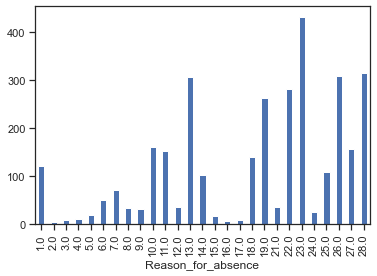

In [77]:
#Plotting graph to show the significance of Reason_for_absence
absenteeism_data.groupby('Reason_for_absence').Absenteeism_time_in_hours.sum().plot(kind='bar')


<AxesSubplot:xlabel='Day_of_the_week'>

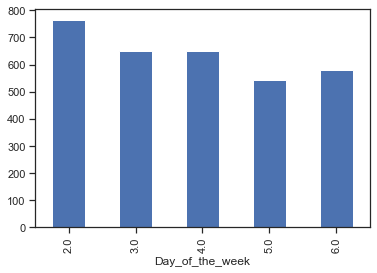

In [78]:
#Plotting graph to show the significance of ID
absenteeism_data.groupby('Day_of_the_week').Absenteeism_time_in_hours.sum().plot(kind='bar')


<AxesSubplot:xlabel='ID'>

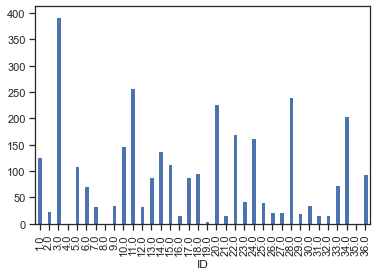

In [79]:
#Plotting graph to show the significance of ID
absenteeism_data.groupby('ID').Absenteeism_time_in_hours.sum().plot(kind='bar')


<AxesSubplot:xlabel='Distance_from_Residence_to_Work'>

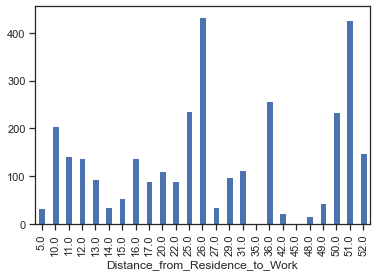

In [80]:
#Plotting graph to show the significance of Distance_from_Residence_to_Work
absenteeism_data.groupby('Distance_from_Residence_to_Work').Absenteeism_time_in_hours.sum().plot(kind='bar')


<AxesSubplot:xlabel='Distance_from_Residence_to_Work'>

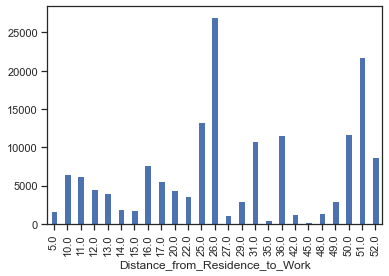

In [81]:
#Plotting graph to show the significance of Distance_from_Residence_to_Work
absenteeism_data.groupby('Distance_from_Residence_to_Work').Transportation_expense.sum().plot(kind='bar')


<AxesSubplot:xlabel='Distance_from_Residence_to_Work'>

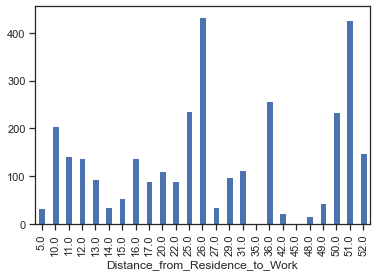

In [82]:
#Plotting graph to show the significance of Distance_from_Residence_to_Work
absenteeism_data.groupby('Distance_from_Residence_to_Work').Absenteeism_time_in_hours.sum().plot(kind='bar')


### Monthly loss trend

<AxesSubplot:xlabel='Month_of_absence'>

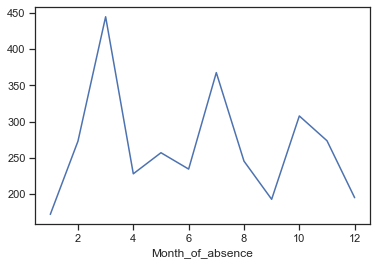

In [83]:
#Plotting graph to show the trend in absence month wise
absenteeism_data.groupby('Month_of_absence').Absenteeism_time_in_hours.sum().plot(kind='line')